In [1]:
#this is code cribbed from the htrc-feature-reader github, only slightly edited

%matplotlib inline
from htrc_features import FeatureReader, utils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
afinn = pd.read_csv("AFINN-111.txt", sep='\t', names=['token','valence'])
afinn[::600]

,token,valence
0,abandon,-2
600,delay,-1
1200,hooliganism,-2
1800,proudly,2
2400,warm,1


In [10]:
scores = [] # manually reads the text file, in case that seems appealing

with open('AFINN-111.txt', 'r') as myScores:
    lines = myScores.readlines()
    for line in lines:
        j = line.split()
        text = ' '.join(j[:-1])
        toScores = [text, int(j[-1])]
        scores.append(toScores)
        
scores

[['abandon', -2],
 ['abandoned', -2],
 ['abandons', -2],
 ['abducted', -2],
 ['abduction', -2],
 ['abductions', -2],
 ['abhor', -3],
 ['abhorred', -3],
 ['abhorrent', -3],
 ['abhors', -3],
 ['abilities', 2],
 ['ability', 2],
 ['aboard', 1],
 ['absentee', -1],
 ['absentees', -1],
 ['absolve', 2],
 ['absolved', 2],
 ['absolves', 2],
 ['absolving', 2],
 ['absorbed', 1],
 ['abuse', -3],
 ['abused', -3],
 ['abuses', -3],
 ['abusive', -3],
 ['accept', 1],
 ['accepted', 1],
 ['accepting', 1],
 ['accepts', 1],
 ['accident', -2],
 ['accidental', -2],
 ['accidentally', -2],
 ['accidents', -2],
 ['accomplish', 2],
 ['accomplished', 2],
 ['accomplishes', 2],
 ['accusation', -2],
 ['accusations', -2],
 ['accuse', -2],
 ['accused', -2],
 ['accuses', -2],
 ['accusing', -2],
 ['ache', -2],
 ['achievable', 1],
 ['aching', -2],
 ['acquit', 2],
 ['acquits', 2],
 ['acquitted', 2],
 ['acquitting', 2],
 ['acrimonious', -3],
 ['active', 1],
 ['adequate', 1],
 ['admire', 3],
 ['admired', 3],
 ['admires', 3],


In [37]:
# Import the os module, for the os.walk function
import os
import zipfile

lst = []

#for this code to work, one needs a folder with the .json.bz2 files corresponding to the desired hathi books, which can be
#acquired by running the rsync code on their virtual machine (such code can be gotten from their website, under algorithms)

# Set the directory you want to start from
rootDir = os.getcwd()
for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        dir_path = os.path.dirname(os.path.abspath(fname))
        # print('\t%s' % fname)
        if '.bz2' in fname:
            lst.append(dirName + '\\' + fname)
            
lst

['C:\\Users\\Gabe\\Downloads\\crusoeTest\\AFINN\\CrusoeFeatures\\aeu\\pairtree_root\\ar\\k+\\=1\\39\\60\\=t\\82\\j8\\1z\\5j\\ark+=13960=t82j81z5j\\aeu.ark+=13960=t82j81z5j.json.bz2',
 'C:\\Users\\Gabe\\Downloads\\crusoeTest\\AFINN\\CrusoeFeatures\\hvd\\pairtree_root\\32\\04\\40\\09\\59\\12\\31\\32044009591231\\hvd.32044009591231.json.bz2',
 'C:\\Users\\Gabe\\Downloads\\crusoeTest\\AFINN\\CrusoeFeatures\\hvd\\pairtree_root\\32\\04\\40\\11\\03\\16\\48\\32044011031648\\hvd.32044011031648.json.bz2',
 'C:\\Users\\Gabe\\Downloads\\crusoeTest\\AFINN\\CrusoeFeatures\\hvd\\pairtree_root\\32\\04\\40\\11\\23\\86\\07\\32044011238607\\hvd.32044011238607.json.bz2',
 'C:\\Users\\Gabe\\Downloads\\crusoeTest\\AFINN\\CrusoeFeatures\\hvd\\pairtree_root\\32\\04\\40\\14\\66\\75\\54\\32044014667554\\hvd.32044014667554.json.bz2',
 'C:\\Users\\Gabe\\Downloads\\crusoeTest\\AFINN\\CrusoeFeatures\\hvd\\pairtree_root\\32\\04\\40\\18\\69\\74\\09\\32044018697409\\hvd.32044018697409.json.bz2',
 'C:\\Users\\Gabe\\Dow

In [38]:
block = lst
vols = FeatureReader(block)
vol = next(bloc.volumes())
vol.tokenlist()[:10]

C:\Users\Gabe\Miniconda3\lib\site-packages\htrc_features\feature_reader.py:603: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  df.sortlevel(inplace=True)


count
page section token       pos         
1    body    (           -LRB-      2
             )           -RRB-      2
             /           NNP        1
             CIHM        NNP        1
             Canadian    NNP        2
             Collection  NNP        1
             Historical  NNP        1
             ICIMH       NNP        1
             IMonographs NNP        1
             Institut    NNP        1

In [4]:
from htrc_features import FeatureReader, utils
import itertools

fr = FeatureReader(lst)
vol = list(itertools.islice(fr.volumes(), 100))
print(vol.title, vol.id)

#for vol in fr:
    #print(vol.title)

ERROR:root:Can't open C:\Users\Gabe\Downloads\crusoeTest\AFINN\CrusoeFeatures\mdp\pairtree_root\39\01\50\78\55\01\03\39015078550103\mdp.39015078550103.json.bz2
Traceback (most recent call last):
  File "C:\Users\Gabe\Miniconda3\lib\site-packages\htrc_features\feature_reader.py", line 243, in _read_json
    rawjson = f.readline()
  File "C:\Users\Gabe\Miniconda3\lib\site-packages\bz2file.py", line 363, in readline
    return io.BufferedIOBase.readline(self, size)
  File "C:\Users\Gabe\Miniconda3\lib\site-packages\bz2file.py", line 286, in peek
    if not self._fill_buffer():
  File "C:\Users\Gabe\Miniconda3\lib\site-packages\bz2file.py", line 218, in _fill_buffer
    self._buffer = self._decompressor.decompress(rawblock)
KeyboardInterrupt


KeyboardInterrupt: 

In [4]:
len(lst)

615

In [12]:
for vol in fr:
    print(vol.oclc)
    break

['861779106']


In [6]:
tl = vol.tokenlist(pos=False, case=False)\
        .reset_index().drop(['section'], axis=1)
tl.columns = ['page', 'token', 'count']
tl[:4]

,page,token,count
0,1,(,2
1,1,),2
2,1,/,1
3,1,canadian,2


In [7]:
meanpages = tl.groupby('page').sum().mean()['count']
tl2 = tl.groupby('page').filter(lambda x: x['count'].sum() > meanpages*0.8)
tl2[:4]

,page,token,count
20,2,"""71",1
21,2,&,1
22,2,'obtenir,1
23,2,'une,1


In [34]:
tl3 = pd.merge(tl, afinn)
# Account for multiple occurrances of the same word
tl3['sentiment_weight'] = tl3['count'] * tl3['valence']
perpage = tl3.drop(['count', 'valence'], axis=1).groupby(['page'], as_index=False).sum()
#perpage[:100:20]
#print(vol.id)
perpage.sort_values(by='sentiment_weight')[:10].sort_values(by='page')

,page,sentiment_weight
15,29,-30
82,102,-28
88,108,-29
94,114,-29
168,190,-28
171,197,-37
197,223,-27
203,229,-29
235,261,-29
301,332,-34


In [15]:
from pandas import DataFrame

perpage['seq'] = range(1, len(perpage)+1)
perpage['mean_valence'] = DataFrame.rolling(perpage['sentiment_weight'],window=20, min_periods=1).mean()

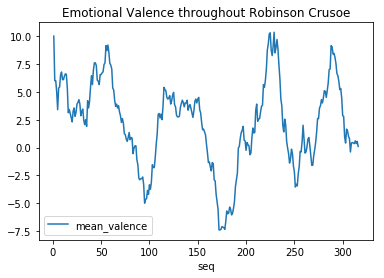

In [16]:
perpage.plot(x='seq',y=['mean_valence'], title="Emotional Valence throughout Robinson Crusoe")

In [4]:
#I condensed the code from the above cells into one 'for' loop that will run through the volumes and print a sentiment analysis
#graph for each volume. I considered finding ways to aggregate the graphs but was unable to do so

from pandas import DataFrame
import itertools

fr = FeatureReader(lst)
#vols = list(itertools.islice(fr.volumes(), 615))
vols = fr.volumes()

for vol in vols:
    break
    tl = vol.tokenlist(pos=False, case=False)\
            .reset_index().drop(['section'], axis=1)
    tl.columns = ['page', 'token', 'count']

    meanpages = tl.groupby('page').sum().mean()['count']
    tl2 = tl.groupby('page').filter(lambda x: x['count'].sum() > meanpages*0.8)

    tl3 = pd.merge(tl, afinn)
    # Account for multiple occurrances of the same word
    tl3['sentiment_weight'] = tl3['count'] * tl3['valence']
    perpage = tl3.drop(['count', 'valence'], axis=1).groupby(['page'], as_index=False).sum()
    print(vol.id)
    print(perpage.sort_values(by='sentiment_weight')[:10].sort_values(by='page'))
    
    perpage['seq'] = range(1, len(perpage)+1)
    perpage['mean_valence'] = DataFrame.rolling(perpage['sentiment_weight'],window=20, min_periods=1).mean()

    perpage.plot(x='seq',y=['mean_valence'], title="Emotional Valence:" + vol.id)

In [36]:
for page in vol:
    df = page.tokenlist(case=False)
    print(df[15:18])

                                     count
page section lowercase          pos       
1    body    microfiche         NNP      1
             microfiches        NNS      1
             microraproductions NNP      1
                            count
page section lowercase pos       
2    body    /         RB       1
                       VBD      1
             12x       CD       1
                            count
page section lowercase pos       
3    body    4         CD       1
             5         CD       1
             :         :        2
                            count
page section lowercase pos       
4    body    ate       VBD      1
             atra      NN       1
                       RP       1
                            count
page section lowercase pos       
5    body    482       CD       1
             716       CD       2
             93^       CD       1
Empty DataFrame
Columns: [count]
Index: []
Empty DataFrame
Columns: [count]
Index: []
Empty DataFrame
Col

             an        DT       1
                            count
page section lowercase pos       
60   body    ;         :        5
             ?         .        2
             ^         .        1
                            count
page section lowercase pos       
61   body    already   RB       1
             and       CC      14
             another   DT       1
                            count
page section lowercase pos       
62   body    ^         NN       1
                       NNP      4
                       VB       1
                            count
page section lowercase pos       
63   body    and       CC      22
             another   DT       1
             as        IN       9
                            count
page section lowercase pos       
64   body    and       CC      19
             animal    NN       1
             any       DT       3
                             count
page section lowercase  pos       
65   body    abroad     RB       1
           

                             count
page section lowercase  pos       
112  body    as         IN       1
             assist     VB       1
             assistance NN       2
                            count
page section lowercase pos       
113  body    .^m       IN       1
             .^£^      NNP      1
             .atr      NNP      1
                            count
page section lowercase pos       
114  body    all       DT       1
                       PDT      3
             almost    RB       1
                            count
page section lowercase pos       
115  body    .in       .        1
             ;{        VBP      1
             >         NNP      1
                            count
page section lowercase pos       
116  body    all       DT       1
                       PDT      1
             almost    RB       1
                            count
page section lowercase pos       
117  body    ***'»     .        1
             *^        NN       1
         

             '/s       .        1
                            count
page section lowercase pos       
162  body    and       CC      11
             applied   VBD      1
             as        IN       3
                            count
page section lowercase pos       
163  body    ''^^p^'   JJ       1
             ''o       .        1
             ''oat     ,        1
                            count
page section lowercase pos       
164  body    1         CD       5
             :         :        2
             ;         :        6
                            count
page section lowercase pos       
165  body    ''^       ''       1
             '*"       ''       1
                       JJ       1
                            count
page section lowercase pos       
166  body    and       CC      25
             any       DT       3
             anything  NN       1
                            count
page section lowercase pos       
167  body    'l^       JJ       1
             '

                            count
page section lowercase pos       
222  body    *^        CD       1
             ,         ,       29
             ,nj       NNP      1
                            count
page section lowercase pos       
223  body    an        DT       2
             and       CC      11
             anv       DT       1
                            count
page section lowercase pos       
224  body    *h-t      JJ       1
             *°**      NNP      1
             ,         ,        9
                            count
page section lowercase pos       
225  body    an'i      CC       1
             and       CC      15
             another   DT       1
                            count
page section lowercase pos       
226  body    '^        ,        1
                       .        1
             '^^a^^    .        1
                            count
page section lowercase pos       
227  body    any       DT       3
             anything  NN       1
             a

                            count
page section lowercase pos       
274  body    :         :        1
             ;         :        8
             ;f        IN       1
                            count
page section lowercase pos       
275  body    any       DT       2
             as        IN       1
             asked     VBD      1
                            count
page section lowercase pos       
276  body    \,y       IN       1
             a         DT       9
             a-,       NN       1
                            count
page section lowercase pos       
277  body    any       DT       3
             appeared  VBD      2
             are       VBP      5
                            count
page section lowercase pos       
278  body    ,t        NN       1
             --        :        1
             .         .        5
                                count
page section lowercase     pos       
279  body    any           DT       1
             apprehensions NNS      

             *''       NNS      1
                            count
page section lowercase pos       
326  body    again     RB       3
             all       DT       1
             amazed    VBN      1
                            count
page section lowercase pos       
327  body    ';        JJ       1
             '^        JJ       5
                       POS      1
                            count
page section lowercase pos       
328  body    about     IN       1
             above     IN       1
             africa    NNP      1
                            count
page section lowercase pos       
329  body    ''^       VBZ      1
             '*        ,        2
                       JJ       1
                             count
page section lowercase  pos       
330  body    again      RB       1
             altogether RB       1
             and        CC      16
                            count
page section lowercase pos       
331  body    '*        .        1
         

In [40]:
counts = []

def checkWord(word):
    try:
        print(all_vol_token_counts.loc[idx[:,'body',word],][:10])
        count.append(1)
    except KeyError:
        print('no ' + word)
        if word == 'carcass':
            checkWord('triangle') #these two are backup checks of other unique words
        elif word == 'print':
            checkWord('footprint')
        else:
            count.append(0)
    except:
        print("error")
        count.append(0)

#vols = fr.volumes()

#checks to see if there's an instance of the word in each hathi book

#right now the code uses 'voles' to remove instances of books that are not Robinson Crusoe
for vol in voles:
    count = []
    count.append(vol.id)
    count.append(vol.year)
    idx = pd.IndexSlice
    all_vol_token_counts = vol.tokenlist(pos=False, case=False)
    print(vol.id + '\n')
    #checkWord('turkish')
    #print('\n')
    checkWord('earthquake')
    print('\n')
    checkWord('print')
    print('\n')
    checkWord('pumping')
    print('\n')
    checkWord('carcass')
    print('\n')
    checkWord('china')
    print('\n')
    counts.append(count)

C:\Users\Gabe\Miniconda3\lib\site-packages\htrc_features\feature_reader.py:603: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  df.sortlevel(inplace=True)


aeu.ark:/13960/t82j81z5j

                        count
page section lowercase       
35   body    turkish        1


                         count
page section lowercase        
102  body    earthquake      3


                        count
page section lowercase       
2    body    print          1
176  body    print          1
177  body    print          1
180  body    print          4
186  body    print          1
199  body    print          1
221  body    print          1


                        count
page section lowercase       
250  body    pumping        1


                        count
page section lowercase       
330  body    carcass        1


no china


hvd.32044009591231

                        count
page section lowercase       
37   body    turkish        1


                         count
page section lowercase        
104  body    earthquake      1
105  body    earthquake      3
107  body    earthquake      1
111  body    earthquake      2
114  body    earthquak

hvd.32044097038137

                        count
page section lowercase       
61   body    turkish        1


                         count
page section lowercase        
129  body    earthquake      1
130  body    earthquake      3
132  body    earthquake      1
136  body    earthquake      1
139  body    earthquake      1
164  body    earthquake      3


                        count
page section lowercase       
16   body    print          1
210  body    print          2
211  body    print          2
214  body    print          1
215  body    print          3
220  body    print          1
221  body    print          1
232  body    print          1
368  body    print          1


                        count
page section lowercase       
266  body    pumping        1


                        count
page section lowercase       
349  body    carcass        1


                        count
page section lowercase       
355  body    china          1


hvd.32044097038202

no turkish

hvd.hn5bvg

no turkish


                         count
page section lowercase        
52   body    earthquake      2
53   body    earthquake      1
54   body    earthquake      1


                        count
page section lowercase       
96   body    print          1
97   body    print          1
99   body    print          1
102  body    print          2
106  body    print          1
119  body    print          1


                        count
page section lowercase       
13   body    pumping        1


no carcass
no triangle


no china


hvd.hn5hib

                        count
page section lowercase       
23   body    turkish        1


                         count
page section lowercase        
72   body    earthquake      1
73   body    earthquake      3
75   body    earthquake      1
77   body    earthquake      2
79   body    earthquake      1


                        count
page section lowercase       
126  body    print          2
127  body    print          2
129  

hvd.hwjv1l

                        count
page section lowercase       
44   body    turkish        1


                         count
page section lowercase        
13   body    earthquake      1
107  body    earthquake      1
108  body    earthquake      3
110  body    earthquake      1
114  body    earthquake      2
116  body    earthquake      1


                        count
page section lowercase       
14   body    print          1
174  body    print          2
176  body    print          2
178  body    print          3
179  body    print          1
182  body    print          1
183  body    print          1
191  body    print          1
212  body    print          1


                        count
page section lowercase       
237  body    pumping        1


no carcass
                        count
page section lowercase       
301  body    triangle       1


                        count
page section lowercase       
16   body    china          1
314  body    china          1

mdp.39015062655355

                        count
page section lowercase       
28   body    turkish        1


                         count
page section lowercase        
90   body    earthquake      1
91   body    earthquake      4
93   body    earthquake      1
96   body    earthquake      2
98   body    earthquake      1


                        count
page section lowercase       
156  body    print          2
158  body    print          2
160  body    print          1
161  body    print          3
165  body    print          1
166  body    print          1
175  body    print          1
194  body    print          1


                        count
page section lowercase       
221  body    pumping        1


                        count
page section lowercase       
293  body    carcass        1


                        count
page section lowercase       
311  body    china          1
416  body    china          1
481  body    china          1
486  body    china          1
490


no turkish


                         count
page section lowercase        
21   body    earthquake      1


no print
no footprint


no pumping


no carcass
no triangle


no china


mdp.39015078548305

no turkish


no earthquake


no print
no footprint


no pumping


no carcass
no triangle


                        count
page section lowercase       
20   body    china          1
121  body    china          1
186  body    china          1
191  body    china          1
195  body    china          1
203  body    china          2
204  body    china          2
205  body    china          2
211  body    china          3
212  body    china          2


mdp.39015078548313

no turkish


                         count
page section lowercase        
93   body    earthquake      1
94   body    earthquake      2
95   body    earthquake      1
97   body    earthquake      1
101  body    earthquake      1
103  body    earthquake      1


                        count
page section lowercase       
16

mdp.39015078548966

no turkish


                         count
page section lowercase        
99   body    earthquake      1
100  body    earthquake      3
103  body    earthquake      1
107  body    earthquake      2
109  body    earthquake      1


                        count
page section lowercase       
178  body    print          2
179  body    print          1
180  body    print          1
183  body    print          3
184  body    print          1
188  body    print          1
190  body    print          1
200  body    print          1
224  body    print          1


                        count
page section lowercase       
254  body    pumping        1


no carcass
                        count
page section lowercase       
336  body    triangle       1


                        count
page section lowercase       
353  body    china          1
471  body    china          1
544  body    china          1
550  body    china          1
555  body    china          1
562  body  

mdp.39015078549097

no turkish


                         count
page section lowercase        
80   body    earthquake      3
81   body    earthquake      1
83   body    earthquake      1
86   body    earthquake      2
89   body    earthquake      1


                        count
page section lowercase       
150  body    print          2
153  body    print          2
156  body    print          3
157  body    print          1
161  body    print          1
162  body    print          1
171  body    print          1
191  body    print          1


                        count
page section lowercase       
219  body    pumping        1


no carcass
                        count
page section lowercase       
290  body    triangle       1


                        count
page section lowercase       
308  body    china          1
413  body    china          1
477  body    china          1
482  body    china          1
487  body    china          1
492  body    china          1
493  body  

mdp.39015078549279

no turkish


                         count
page section lowercase        
43   body    earthquake      2
44   body    earthquake      2
45   body    earthquake      1
47   body    earthquake      1
48   body    earthquake      1


                        count
page section lowercase       
85   body    print          2
87   body    print          1
89   body    print          2
93   body    print          1
107  body    print          1


                        count
page section lowercase       
11   body    pumping        1
143  body    pumping        1


no carcass
                        count
page section lowercase       
179  body    triangle       1


                        count
page section lowercase       
187  body    china          1
250  body    china          1
281  body    china          1
283  body    china          1
287  body    china          1
288  body    china          2
292  body    china          4
294  body    china          1
302  body  

mdp.39015078549543

no turkish


                         count
page section lowercase        
45   body    earthquake      2
46   body    earthquake      2
47   body    earthquake      1
49   body    earthquake      1
50   body    earthquake      1


                        count
page section lowercase       
87   body    print          2
89   body    print          1
91   body    print          2
95   body    print          1
109  body    print          1


                        count
page section lowercase       
13   body    pumping        1
145  body    pumping        1


                        count
page section lowercase       
179  body    carcass        1


                        count
page section lowercase       
190  body    china          1
251  body    china          1
281  body    china          1
283  body    china          1
288  body    china          2
292  body    china          4
294  body    china          1
296  body    china          1
301  body    china    

mdp.39015078549667

no turkish


                         count
page section lowercase        
109  body    earthquake      1
110  body    earthquake      3
113  body    earthquake      1
118  body    earthquake      2
121  body    earthquake      1


                        count
page section lowercase       
198  body    print          2
199  body    print          2
203  body    print          3
204  body    print          1
209  body    print          1
210  body    print          1
223  body    print          1
249  body    print          1


                        count
page section lowercase       
285  body    pumping        1


no carcass
                        count
page section lowercase       
376  body    triangle       1


no china


mdp.39015078549683

no turkish


                         count
page section lowercase        
29   body    earthquake      1


                        count
page section lowercase       
45   body    print          1


no pumping


no carc

mdp.39015078549840

no turkish


no earthquake


no print
no footprint


no pumping


no carcass
no triangle


                        count
page section lowercase       
14   body    china          1
119  body    china          1
187  body    china          1
192  body    china          1
197  body    china          1
203  body    china          2
204  body    china          1
205  body    china          1
206  body    china          2
212  body    china          6


mdp.39015078549857

no turkish


                         count
page section lowercase        
88   body    earthquake      1
89   body    earthquake      3
92   body    earthquake      1
95   body    earthquake      2
97   body    earthquake      1


                        count
page section lowercase       
156  body    print          2
157  body    print          2
161  body    print          1
162  body    print          1
172  body    print          1
192  body    print          1
226  body    print          2
227  

mdp.39015078549998

no turkish


no earthquake


no print
no footprint


no pumping


no carcass
no triangle


                        count
page section lowercase       
16   body    china          1
176  body    china          1
182  body    china          1
187  body    china          1
193  body    china          1
194  body    china          1
195  body    china          2
196  body    china          1
197  body    china          1
204  body    china          1


mdp.39015078550004

                        count
page section lowercase       
49   body    turkish        1


                         count
page section lowercase        
121  body    earthquake      2
122  body    earthquake      3
124  body    earthquake      1
128  body    earthquake      2
131  body    earthquake      1


                        count
page section lowercase       
202  body    print          2
205  body    print          2
208  body    print          2
209  body    print          2
214  body    pri

mdp.39015078550160

                        count
page section lowercase       
23   body    turkish        1


                         count
page section lowercase        
90   body    earthquake      1
91   body    earthquake      3
93   body    earthquake      1
98   body    earthquake      2
100  body    earthquake      1


                        count
page section lowercase       
163  body    print          2
164  body    print          1
165  body    print          2
168  body    print          4
173  body    print          1
174  body    print          1
183  body    print          1
204  body    print          1


                        count
page section lowercase       
233  body    pumping        1


no carcass
                        count
page section lowercase       
308  body    triangle       1


                        count
page section lowercase       
324  body    china          1
431  body    china          1
480  body    china          1
497  body    china    

mdp.39015078550327

                        count
page section lowercase       
34   body    turkish        1


                         count
page section lowercase        
93   body    earthquake      1
94   body    earthquake      2
95   body    earthquake      1
97   body    earthquake      1
100  body    earthquake      2
102  body    earthquake      1


                        count
page section lowercase       
162  body    print          1
163  body    print          1
164  body    print          2
167  body    print          3
168  body    print          1
172  body    print          1
173  body    print          1
182  body    print          1
203  body    print          1


                        count
page section lowercase       
230  body    pumping        1


no carcass
                        count
page section lowercase       
301  body    triangle       1


no china


mdp.39015078550335

no turkish


no earthquake


no print
no footprint


no pumping


no carcass
no 

mdp.39015078550475

no turkish


                         count
page section lowercase        
64   body    earthquake      2
65   body    earthquake      1


                        count
page section lowercase       
108  body    print          1
110  body    print          1
113  body    print          2
117  body    print          1
130  body    print          1


                        count
page section lowercase       
27   body    pumping        1


no carcass
no triangle


no china


mdp.39015078550483

                        count
page section lowercase       
140  body    turkish        1


                         count
page section lowercase        
244  body    earthquake      1
245  body    earthquake      2
246  body    earthquake      1
249  body    earthquake      1
254  body    earthquake      2
257  body    earthquake      1


                        count
page section lowercase       
111  body    print          2
355  body    print          2
356  body    print 

mdp.39015078550582

no turkish


no earthquake


no print
no footprint


no pumping


no carcass
no triangle


                        count
page section lowercase       
23   body    china          1
177  body    china          1
272  body    china          1
280  body    china          1
287  body    china          1
295  body    china          1
296  body    china          1
297  body    china          1
298  body    china          1
299  body    china          1


mdp.39015078550590

                        count
page section lowercase       
55   body    turkish        1


                         count
page section lowercase        
145  body    earthquake      1
146  body    earthquake      2
147  body    earthquake      1
150  body    earthquake      1
155  body    earthquake      2
158  body    earthquake      1


                        count
page section lowercase       
250  body    print          1
251  body    print          1
252  body    print          2
256  body    pr

mdp.39015078550715

                        count
page section lowercase       
43   body    turkish        1


                         count
page section lowercase        
11   body    earthquake      1
114  body    earthquake      1
115  body    earthquake      2
116  body    earthquake      1
118  body    earthquake      1
122  body    earthquake      2
127  body    earthquake      1


                        count
page section lowercase       
196  body    print          2
199  body    print          2
202  body    print          2
203  body    print          2
208  body    print          1
209  body    print          1
220  body    print          1
245  body    print          1


                        count
page section lowercase       
271  body    pumping        1


no carcass
                        count
page section lowercase       
357  body    triangle       1


                        count
page section lowercase       
15   body    china          1
369  body    china  

mdp.39015078550889

                        count
page section lowercase       
32   body    turkish        1


                         count
page section lowercase        
17   body    earthquake      1
71   body    earthquake      1
73   body    earthquake      1
75   body    earthquake      2


                        count
page section lowercase       
120  body    print          2
121  body    print          2
123  body    print          3
126  body    print          1
130  body    print          1
142  body    print          1


no pumping


no carcass
                        count
page section lowercase       
217  body    triangle       1


                        count
page section lowercase       
15   body    china          1
20   body    china          1
228  body    china          1
299  body    china          1
335  body    china          1
340  body    china          1
344  body    china          2
345  body    china          4
349  body    china          5
352  body   

mdp.39015078550962

                        count
page section lowercase       
41   body    turkish        1


                         count
page section lowercase        
120  body    earthquake      1
123  body    earthquake      3
126  body    earthquake      1
130  body    earthquake      2
132  body    earthquake      1


                        count
page section lowercase       
214  body    print          1
215  body    print          2
216  body    print          2
219  body    print          4
225  body    print          1
226  body    print          1
240  body    print          1
267  body    print          1


                        count
page section lowercase       
300  body    pumping        1


no carcass
                        count
page section lowercase       
392  body    triangle       1


                        count
page section lowercase       
408  body    china          1
541  body    china          1
598  body    china          1
621  body    china    

mdp.39015078551077

no turkish


                         count
page section lowercase        
93   body    earthquake      1


                        count
page section lowercase       
141  body    print          1
142  body    print          1
144  body    print          2
147  body    print          2
151  body    print          1
152  body    print          1


                        count
page section lowercase       
203  body    pumping        1


no carcass
                        count
page section lowercase       
292  body    triangle       1


no china


mdp.39015078551085

no turkish


                         count
page section lowercase        
45   body    earthquake      2
46   body    earthquake      1
47   body    earthquake      1


                        count
page section lowercase       
83   body    print          1
85   body    print          1
86   body    print          1
103  body    print          1


                        count
page section lowercase

mdp.39015078551192

                        count
page section lowercase       
31   body    turkish        1


                         count
page section lowercase        
98   body    earthquake      1
99   body    earthquake      3
101  body    earthquake      1
106  body    earthquake      1
108  body    earthquake      1


                        count
page section lowercase       
171  body    print          2
173  body    print          2
176  body    print          4
181  body    print          1
182  body    print          1
191  body    print          1
212  body    print          1


                        count
page section lowercase       
241  body    pumping        1


no carcass
                        count
page section lowercase       
316  body    triangle       1


                        count
page section lowercase       
332  body    china          1
439  body    china          1
488  body    china          1
505  body    china          1
510  body    china    

mdp.39015078551317

no turkish


                         count
page section lowercase        
10   body    earthquake      1
56   body    earthquake      2


                        count
page section lowercase       
106  body    print          1
107  body    print          1
108  body    print          3
112  body    print          1


no pumping


                        count
page section lowercase       
206  body    carcass        1


                        count
page section lowercase       
14   body    china          2
209  body    china          1
287  body    china          1
291  body    china          1
295  body    china          1
296  body    china          1
301  body    china          2
302  body    china          3
310  body    china          1
311  body    china          1


mdp.39015078551325

                        count
page section lowercase       
9    body    turkish        1


                         count
page section lowercase        
25   body    earth

mdp.39015078551408

                        count
page section lowercase       
44   body    turkish        1


                         count
page section lowercase        
11   body    earthquake      1
96   body    earthquake      1
97   body    earthquake      3
100  body    earthquake      1
102  body    earthquake      2
104  body    earthquake      1


                        count
page section lowercase       
159  body    print          2
160  body    print          2
162  body    print          2
163  body    print          2
167  body    print          1
168  body    print          1
177  body    print          1
195  body    print          1


                        count
page section lowercase       
213  body    pumping        1


no carcass
                        count
page section lowercase       
273  body    triangle       1


                        count
page section lowercase       
282  body    china          1
370  body    china          1
408  body    china   

mdp.39015078551523

                        count
page section lowercase       
36   body    turkish        1


                         count
page section lowercase        
78   body    earthquake      1
79   body    earthquake      3
80   body    earthquake      1
83   body    earthquake      2
84   body    earthquake      1


                        count
page section lowercase       
124  body    print          2
125  body    print          2
126  body    print          1
127  body    print          3
130  body    print          2
137  body    print          1
150  body    print          1


                        count
page section lowercase       
169  body    pumping        1


no carcass
                        count
page section lowercase       
220  body    triangle       1


                        count
page section lowercase       
231  body    china          1
299  body    china          1
330  body    china          1
340  body    china          1
344  body    china    

mdp.39015078551770

no turkish


                         count
page section lowercase        
74   body    earthquake      1
75   body    earthquake      4
79   body    earthquake      1
80   body    earthquake      1
82   body    earthquake      1


                        count
page section lowercase       
128  body    print          2
131  body    print          2
133  body    print          2
134  body    print          2
137  body    print          1
138  body    print          1
145  body    print          1
160  body    print          1


                        count
page section lowercase       
182  body    pumping        1


no carcass
                        count
page section lowercase       
240  body    triangle       1


                        count
page section lowercase       
249  body    china          1
334  body    china          1
371  body    china          1
383  body    china          1
387  body    china          1
390  body    china          1
394  body  

mdp.39015078551978

                        count
page section lowercase       
57   body    turkish        1


                         count
page section lowercase        
120  body    earthquake      1
121  body    earthquake      2
122  body    earthquake      1
124  body    earthquake      1
128  body    earthquake      2
132  body    earthquake      1


                        count
page section lowercase       
198  body    print          2
199  body    print          2
202  body    print          3
203  body    print          1
207  body    print          1
208  body    print          1
219  body    print          1
243  body    print          1


                        count
page section lowercase       
272  body    pumping        1


                        count
page section lowercase       
351  body    carcass        1


                        count
page section lowercase       
368  body    china          1
484  body    china          1
555  body    china          1
56

mdp.39015078552109

no turkish


                         count
page section lowercase        
94   body    earthquake      1
95   body    earthquake      2
96   body    earthquake      1
98   body    earthquake      1
101  body    earthquake      2
104  body    earthquake      1


                        count
page section lowercase       
160  body    print          2
161  body    print          2
163  body    print          2
164  body    print          2
168  body    print          1
169  body    print          1
178  body    print          1


                        count
page section lowercase       
222  body    pumping        1


no carcass
                        count
page section lowercase       
283  body    triangle       1


                        count
page section lowercase       
291  body    china          1
348  body    china          1
386  body    china          1
389  body    china          1
393  body    china          2
394  body    china          1
398  body 

mdp.39015078552265

no turkish


                         count
page section lowercase        
73   body    earthquake      5
75   body    earthquake      1
77   body    earthquake      2
78   body    earthquake      1


                        count
page section lowercase       
121  body    print          1
122  body    print          3
124  body    print          2
125  body    print          2
128  body    print          1
129  body    print          1
136  body    print          1
150  body    print          1
414  body    print          1


                        count
page section lowercase       
169  body    pumping        1


no carcass
                        count
page section lowercase       
220  body    triangle       1


                        count
page section lowercase       
12   body    china          1
228  body    china          1
300  body    china          1
333  body    china          1
344  body    china          1
348  body    china          1
352  body   

mdp.39015078552372

no turkish


                         count
page section lowercase        
33   body    earthquake      1
47   body    earthquake      2
48   body    earthquake      1
49   body    earthquake      1


                        count
page section lowercase       
85   body    print          1
86   body    print          1
88   body    print          2
91   body    print          1
104  body    print          1


                        count
page section lowercase       
16   body    pumping        1


                        count
page section lowercase       
25   body    carcass        1
107  body    carcass        1
114  body    carcass        1


no china


mdp.39015078552398

                        count
page section lowercase       
43   body    turkish        1


                         count
page section lowercase        
112  body    earthquake      1
113  body    earthquake      2
114  body    earthquake      1
116  body    earthquake      1
120  body    e

mdp.39015078552497

                        count
page section lowercase       
44   body    turkish        1


                         count
page section lowercase        
15   body    earthquake      1
87   body    earthquake      1
88   body    earthquake      3
90   body    earthquake      1
92   body    earthquake      2
94   body    earthquake      1


                        count
page section lowercase       
144  body    print          2
145  body    print          1
147  body    print          2
149  body    print          4
152  body    print          1
153  body    print          1
160  body    print          1
175  body    print          1


                        count
page section lowercase       
192  body    pumping        1


no carcass
                        count
page section lowercase       
246  body    triangle       1


                        count
page section lowercase       
254  body    china          1
329  body    china          1
363  body    china   

mdp.39015078552570

                        count
page section lowercase       
34   body    turkish        1
524  body    turkish        1


                         count
page section lowercase        
88   body    earthquake      1
91   body    earthquake      1
92   body    earthquake      3
94   body    earthquake      1
97   body    earthquake      2
100  body    earthquake      1


                        count
page section lowercase       
15   body    print          1
155  body    print          3
156  body    print          2
159  body    print          4
163  body    print          1
164  body    print          1
173  body    print          1
191  body    print          1


                        count
page section lowercase       
215  body    pumping        1


no carcass
                        count
page section lowercase       
280  body    triangle       1


                        count
page section lowercase       
18   body    china          1
290  body    china   

mdp.39015078552679

                        count
page section lowercase       
12   body    turkish        1


                         count
page section lowercase        
43   body    earthquake      1
44   body    earthquake      3
45   body    earthquake      1
47   body    earthquake      2


                        count
page section lowercase       
83   body    print          4
85   body    print          4
88   body    print          2
94   body    print          1
106  body    print          1


                        count
page section lowercase       
123  body    pumping        1


no carcass
                        count
page section lowercase       
166  body    triangle       1


                        count
page section lowercase       
173  body    china          1
230  body    china          1
265  body    china          1
266  body    china          1
268  body    china          1
271  body    china          2
272  body    china          1
274  body    china     

mdp.39015078552877

                        count
page section lowercase       
43   body    turkish        1


                         count
page section lowercase        
12   body    earthquake      1
86   body    earthquake      1
94   body    earthquake      1
95   body    earthquake      3
97   body    earthquake      1
100  body    earthquake      2
102  body    earthquake      1


                        count
page section lowercase       
154  body    print          2
155  body    print          2
157  body    print          3
158  body    print          1
161  body    print          1
162  body    print          1
170  body    print          1
189  body    print          1


                        count
page section lowercase       
209  body    pumping        1


no carcass
                        count
page section lowercase       
268  body    triangle       1


                        count
page section lowercase       
17   body    china          1
276  body    china  

mdp.39015078552984

no turkish


                         count
page section lowercase        
76   body    earthquake      1
77   body    earthquake      4
79   body    earthquake      1
82   body    earthquake      2
84   body    earthquake      1


                        count
page section lowercase       
132  body    print          2
135  body    print          2
137  body    print          2
138  body    print          2
141  body    print          1
142  body    print          1
151  body    print          1
166  body    print          1


                        count
page section lowercase       
189  body    pumping        1


no carcass
                        count
page section lowercase       
247  body    triangle       1


                        count
page section lowercase       
256  body    china          1
343  body    china          1
381  body    china          1
393  body    china          1
397  body    china          1
400  body    china          1
404  body  

mdp.39015078553180

                        count
page section lowercase       
25   body    turkish        1


                         count
page section lowercase        
65   body    earthquake      1


                        count
page section lowercase       
113  body    print          2
115  body    print          3
116  body    print          1
119  body    print          1
120  body    print          1
135  body    print          1


no pumping


no carcass
                        count
page section lowercase       
208  body    triangle       1


                        count
page section lowercase       
12   body    china          1
212  body    china          1
285  body    china          1
289  body    china          1
290  body    china          1
292  body    china          1
296  body    china          2
297  body    china          1
298  body    china          3
302  body    china          5


mdp.39015078553198

                        count
page section lowercase 

mdp.39015078553297

                        count
page section lowercase       
47   body    turkish        1


                         count
page section lowercase        
117  body    earthquake      1
118  body    earthquake      2
119  body    earthquake      1
121  body    earthquake      1
125  body    earthquake      2
127  body    earthquake      1


                        count
page section lowercase       
195  body    print          1
196  body    print          2
197  body    print          1
200  body    print          3
201  body    print          1
205  body    print          1
206  body    print          1
217  body    print          1
239  body    print          1


                        count
page section lowercase       
269  body    pumping        1


no carcass
                        count
page section lowercase       
353  body    triangle       1


                        count
page section lowercase       
368  body    china          1
481  body    china   

mdp.39015078553362

                        count
page section lowercase       
41   body    turkish        1


                         count
page section lowercase        
101  body    earthquake      1
102  body    earthquake      3
104  body    earthquake      1
110  body    earthquake      2
112  body    earthquake      1


                        count
page section lowercase       
19   body    print          1
174  body    print          2
175  body    print          2
178  body    print          4
182  body    print          1
183  body    print          1
194  body    print          1
214  body    print          1


                        count
page section lowercase       
241  body    pumping        1


no carcass
                        count
page section lowercase       
314  body    triangle       1


                        count
page section lowercase       
14   body    china          1
330  body    china          1
430  body    china          1
494  body    china    

mdp.39015078553511

no turkish


no earthquake


no print
no footprint


                        count
page section lowercase       
23   body    pumping        1


                        count
page section lowercase       
93   body    carcass        1


                        count
page section lowercase       
104  body    china          1
184  body    china          1
209  body    china          1
210  body    china          1
212  body    china          1
214  body    china          2
215  body    china          1
216  body    china          2
218  body    china          1
220  body    china          1


mdp.39015078553529

                        count
page section lowercase       
17   body    turkish        1
45   body    turkish        1
47   body    turkish        1


                         count
page section lowercase        
18   body    earthquake      1
105  body    earthquake      1
108  body    earthquake      1
109  body    earthquake      3
111  body    earthquake

mdp.39015078553685

                        count
page section lowercase       
24   body    turkish        1


                         count
page section lowercase        
72   body    earthquake      4
74   body    earthquake      1
76   body    earthquake      2
78   body    earthquake      1


                        count
page section lowercase       
13   body    print          1
120  body    print          2
123  body    print          2
125  body    print          4
128  body    print          1
129  body    print          1
135  body    print          1
151  body    print          1


                        count
page section lowercase       
170  body    pumping        1


no carcass
                        count
page section lowercase       
221  body    triangle       1


                        count
page section lowercase       
231  body    china          1
311  body    china          1
355  body    china          1
359  body    china          1
362  body    china     

mdp.39015078553834

                        count
page section lowercase       
35   body    turkish        1


                         count
page section lowercase        
122  body    earthquake      1
124  body    earthquake      3
127  body    earthquake      1
132  body    earthquake      2
136  body    earthquake      1


                        count
page section lowercase       
225  body    print          1
226  body    print          1
227  body    print          2
231  body    print          2
232  body    print          2
238  body    print          1
240  body    print          1
253  body    print          1
284  body    print          1


                        count
page section lowercase       
322  body    pumping        1


                        count
page section lowercase       
428  body    carcass        1


no china


mdp.39015078553842

                        count
page section lowercase       
13   body    turkish        1
29   body    turkish        1




mdp.39015078554204

no turkish


no earthquake


no print
                        count
page section lowercase       
31   body    footprint      2
32   body    footprint      1
33   body    footprint      1


no pumping


no carcass
no triangle


                        count
page section lowercase       
64   body    china          1


mdp.39015078554212

no turkish


                         count
page section lowercase        
85   body    earthquake      1
86   body    earthquake      3
88   body    earthquake      1
91   body    earthquake      2
94   body    earthquake      1


                        count
page section lowercase       
156  body    print          2
157  body    print          2
160  body    print          4
164  body    print          1
166  body    print          1
177  body    print          1
196  body    print          1


                        count
page section lowercase       
224  body    pumping        1


no carcass
                        count
pag

mdp.39015078554501

no turkish


                         count
page section lowercase        
12   body    earthquake      1
122  body    earthquake      1
123  body    earthquake      3
126  body    earthquake      1
131  body    earthquake      2
134  body    earthquake      1


                        count
page section lowercase       
13   body    print          1
218  body    print          2
219  body    print          2
223  body    print          3
224  body    print          1
230  body    print          1
231  body    print          1
244  body    print          1
271  body    print          1


                        count
page section lowercase       
311  body    pumping        1


                        count
page section lowercase       
411  body    carcass        1


no china


mdp.39015078554519

                        count
page section lowercase       
45   body    turkish        1


                         count
page section lowercase        
117  body    ear

mdp.39015078554758

                        count
page section lowercase       
27   body    turkish        1


                         count
page section lowercase        
93   body    earthquake      1
95   body    earthquake      3
97   body    earthquake      1
101  body    earthquake      2
104  body    earthquake      1


                        count
page section lowercase       
171  body    print          1
172  body    print          1
173  body    print          2
176  body    print          2
177  body    print          2
182  body    print          1
183  body    print          1
194  body    print          1
217  body    print          1


                        count
page section lowercase       
247  body    pumping        1


                        count
page section lowercase       
328  body    carcass        1


no china


mdp.39015078554766

no turkish


                         count
page section lowercase        
15   body    earthquake      1
44   body    ear

mdp.39015078555037

no turkish


                         count
page section lowercase        
135  body    earthquake      1
136  body    earthquake      1
138  body    earthquake      1
139  body    earthquake      1
168  body    earthquake      1
171  body    earthquake      1
314  body    earthquake      2
315  body    earthquake      1
318  body    earthquake      2
319  body    earthquake      3


                        count
page section lowercase       
223  body    print          1
224  body    print          1
391  body    print          1


no pumping


                        count
page section lowercase       
71   body    carcass        1


                        count
page section lowercase       
143  body    china          2


mdp.39015078555052

no turkish


no earthquake


no print
                        count
page section lowercase       
18   body    footprint      2


no pumping


no carcass
no triangle


no china


mdp.39015078555060

no turkish


            

mdp.39015078555615

                        count
page section lowercase       
27   body    turkish        1


                         count
page section lowercase        
84   body    earthquake      1
85   body    earthquake      4
88   body    earthquake      1
91   body    earthquake      2
93   body    earthquake      1


                        count
page section lowercase       
150  body    print          2
152  body    print          2
154  body    print          1
155  body    print          3
159  body    print          1
160  body    print          1
170  body    print          1
190  body    print          1


                        count
page section lowercase       
215  body    pumping        1


                        count
page section lowercase       
284  body    carcass        1


no china


mdp.39015078555680

                        count
page section lowercase       
6    body    turkish        1


no earthquake


                        count
page section l

mdp.39015078556431

no turkish


                         count
page section lowercase        
101  body    earthquake      1


                        count
page section lowercase       
14   body    print          1
73   body    print          1
93   body    print          1
97   body    print          1


no pumping


no carcass
no triangle


no china


mdp.39015078556449

no turkish


no earthquake


                        count
page section lowercase       
8    body    print          1


no pumping


no carcass
no triangle


no china


mdp.39015078556456

no turkish


no earthquake


                        count
page section lowercase       
10   body    print          1


no pumping


no carcass
no triangle


no china


mdp.39015078556472

no turkish


no earthquake


no print
no footprint


no pumping


no carcass
no triangle


no china


mdp.39015078556530

no turkish


                         count
page section lowercase        
9    body    earthquake      1
23   body    

mdp.39015078558817

no turkish


no earthquake


no print
                        count
page section lowercase       
49   body    footprint      1


no pumping


no carcass
no triangle


                        count
page section lowercase       
69   body    china          1


mdp.39015078559112

no turkish


no earthquake


                        count
page section lowercase       
20   body    print          2
21   body    print          1


no pumping


no carcass
no triangle


no china


mdp.39015078559120

no turkish


no earthquake


                        count
page section lowercase       
9    body    print          2


no pumping


no carcass
no triangle


no china


mdp.39015078559138

no turkish


no earthquake


no print
no footprint


no pumping


no carcass
no triangle


no china


mdp.39015078559146

no turkish


                         count
page section lowercase        
22   body    earthquake      1
23   body    earthquake      1


                        count

nc01.ark:/13960/t6c25z89z

                        count
page section lowercase       
43   body    turkish        1


                         count
page section lowercase        
13   body    earthquake      1
115  body    earthquake      1
128  body    earthquake      1
129  body    earthquake      2
130  body    earthquake      1
136  body    earthquake      1
140  body    earthquake      2
143  body    earthquake      1


                        count
page section lowercase       
235  body    print          2
236  body    print          2
242  body    print          2
243  body    print          2
249  body    print          1
251  body    print          1
264  body    print          1
295  body    print          1


                        count
page section lowercase       
335  body    pumping        1


no carcass
no triangle


no china


njp.32101013427503

                        count
page section lowercase       
34   body    turkish        1


                         co

nyp.33433074911938

no turkish


                         count
page section lowercase        
10   body    earthquake      1
162  body    earthquake      1
178  body    earthquake      1
180  body    earthquake      2
181  body    earthquake      1
185  body    earthquake      1
191  body    earthquake      2
195  body    earthquake      1


                        count
page section lowercase       
12   body    print          1
290  body    print          1
298  body    print          2
299  body    print          1
301  body    print          2
306  body    print          2
307  body    print          2
315  body    print          1
317  body    print          1
332  body    print          1


no pumping


no carcass
no triangle


no china


nyp.33433074911946

no turkish


no earthquake


                        count
page section lowercase       
39   body    print          1


                        count
page section lowercase       
85   body    pumping        1


no carcass


nyp.33433074919766

no turkish


                         count
page section lowercase        
49   body    earthquake      3
50   body    earthquake      2
54   body    earthquake      1


                        count
page section lowercase       
87   body    print          2
89   body    print          1
91   body    print          2
95   body    print          1
108  body    print          1


                        count
page section lowercase       
16   body    pumping        1
144  body    pumping        1


no carcass
                        count
page section lowercase       
181  body    triangle       1


                        count
page section lowercase       
189  body    china          1
246  body    china          1
275  body    china          1
276  body    china          1
281  body    china          2
282  body    china          1
285  body    china          3
287  body    china          1
294  body    china          1
295  body    china          1


nyp.3343307

nyp.33433106125564

                        count
page section lowercase       
42   body    turkish        1


                         count
page section lowercase        
109  body    earthquake      1
110  body    earthquake      3
112  body    earthquake      1
115  body    earthquake      1
116  body    earthquake      1
118  body    earthquake      1


                        count
page section lowercase       
181  body    print          1
182  body    print          1
183  body    print          2
185  body    print          2
186  body    print          2
190  body    print          1
193  body    print          1
197  body    print          1
218  body    print          1


                        count
page section lowercase       
245  body    pumping        1


                        count
page section lowercase       
319  body    carcass        1


                        count
page section lowercase       
337  body    china          1
444  body    china          1
50

uc1.b3575713

                        count
page section lowercase       
45   body    turkish        1


                         count
page section lowercase        
151  body    earthquake      1
153  body    earthquake      3
157  body    earthquake      1
162  body    earthquake      2
165  body    earthquake      1


                        count
page section lowercase       
19   body    print          1


no pumping


no carcass
no triangle


no china


uc1.b3575714

no turkish


no earthquake


                        count
page section lowercase       
17   body    print          2
19   body    print          2
23   body    print          3
24   body    print          1
30   body    print          1
32   body    print          1
46   body    print          1
78   body    print          1


                        count
page section lowercase       
123  body    pumping        1


no carcass
                        count
page section lowercase       
237  body    triangle     

uc2.ark:/13960/t8bg2x80f

no turkish


no earthquake


                        count
page section lowercase       
167  body    print          1
169  body    print          2


no pumping


no carcass
                        count
page section lowercase       
63   body    triangle       1


                        count
page section lowercase       
83   body    china          1


uc2.ark:/13960/t9w091f7c

                        count
page section lowercase       
38   body    turkish        1


                         count
page section lowercase        
109  body    earthquake      1
111  body    earthquake      3
114  body    earthquake      1
117  body    earthquake      1
118  body    earthquake      1
120  body    earthquake      1


                        count
page section lowercase       
192  body    print          2
193  body    print          2
196  body    print          1
197  body    print          3
202  body    print          1
204  body    print          1
215  bo

uva.x001268447

                        count
page section lowercase       
27   body    turkish        1


                         count
page section lowercase        
82   body    earthquake      1
83   body    earthquake      1
85   body    earthquake      1


                        count
page section lowercase       
133  body    print          4
134  body    print          2
137  body    print          1
138  body    print          1


no pumping


no carcass
no triangle


no china


uva.x002579440

no turkish


no earthquake


no print
no footprint


no pumping


no carcass
no triangle


no china


uva.x004246512

                        count
page section lowercase       
49   body    turkish        1


                         count
page section lowercase        
15   body    earthquake      1
96   body    earthquake      1
103  body    earthquake      1
104  body    earthquake      3
106  body    earthquake      1
109  body    earthquake      2
111  body    earthquake      1

In [40]:
from operator import itemgetter

sorted(counts, key=itemgetter(2,3,4,5,6,1,0), reverse=True)

[['mdp.39015078554337', '1930', 1, 1, 1, 1, 1],
 ['mdp.39015078554212', '1920', 1, 1, 1, 1, 1],
 ['mdp.39076002315849', '1919', 1, 1, 1, 1, 1],
 ['mdp.39015078552950', '1919', 1, 1, 1, 1, 1],
 ['mdp.39015078553701', '1916', 1, 1, 1, 1, 1],
 ['hvd.32044097038137', '1913', 1, 1, 1, 1, 1],
 ['mdp.39015078554048', '1911', 1, 1, 1, 1, 1],
 ['mdp.39015078553784', '1911', 1, 1, 1, 1, 1],
 ['hvd.32044097038327', '1911', 1, 1, 1, 1, 1],
 ['mdp.39015078554261', '1910', 1, 1, 1, 1, 1],
 ['mdp.39015078554253', '1910', 1, 1, 1, 1, 1],
 ['mdp.39015074252175', '1910', 1, 1, 1, 1, 1],
 ['mdp.39015062655355', '1910', 1, 1, 1, 1, 1],
 ['mdp.39015078552984', '1908', 1, 1, 1, 1, 1],
 ['uc1.32106012088172', '1907', 1, 1, 1, 1, 1],
 ['mdp.39015078554097', '1906', 1, 1, 1, 1, 1],
 ['mdp.39015078551978', '1905', 1, 1, 1, 1, 1],
 ['mdp.39015078551960', '1905', 1, 1, 1, 1, 1],
 ['mdp.39015078554196', '1904', 1, 1, 1, 1, 1],
 ['umn.31951002376150l', '1903', 1, 1, 1, 1, 1],
 ['mdp.39015078551770', '1903', 1, 1, 1

In [38]:
vals = []
freqs = []

for count in sorted(counts, key=itemgetter(1,2,3,4,5), reverse=True):
    num = ''
    for co in count[2:]:
        num += str(co)
    if num not in vals:
        vals.append(num)
        freqs.append([count[0] + ' ' + count[1]]) #creates frequency list of the unique codes, might be better off appending
    else:                                         #a list rather than two elements separated by a space
        ind = vals.index(num)
        freqs[ind].append(count[0] + ' ' + count[1])

info = []
for i, val in enumerate(vals):
    info.append([val, len(freqs[i])]) # actually counts the frequencies

for thing in sorted(info, key=itemgetter(1), reverse=True):
    print(thing[0] + '\n' + '\n'.join(freqs[vals.index(thing[0])])) # prints unique code followed by list
    print('\n')

words = ['earthquake','footprint','jealousy','carcass','part two']
for item in sorted(info, key=itemgetter(1), reverse=True): # prints code meaning followed by frequency
    inbook = []
    for j, nu in enumerate(item[0]):
        if nu == '1':
            inbook.append(words[j])
    print(' '.join(inbook))
    print(item[1])

11111
mdp.39015078554337 1930
mdp.39015078554212 1920
mdp.39015078552950 1919
mdp.39076002315849 1919
mdp.39015078553701 1916
hvd.32044097038137 1913
hvd.32044097038327 1911
mdp.39015078553784 1911
mdp.39015078554048 1911
mdp.39015062655355 1910
mdp.39015074252175 1910
mdp.39015078554253 1910
mdp.39015078554261 1910
mdp.39015078552984 1908
uc1.32106012088172 1907
mdp.39015078554097 1906
mdp.39015078551960 1905
mdp.39015078551978 1905
mdp.39015078554196 1904
mdp.39015078551770 1903
umn.31951002376150l 1903
mdp.39015078551812 1901
mdp.39015078551846 1900
mdp.39015078551861 1900
mdp.39015078554675 1900
hvd.hwjv24 1899
mdp.39015078551242 1899
mdp.39015078553024 1899
mdp.39015078553032 1899
mdp.39015078553057 1899
mdp.39015078553594 1899
mdp.39015078553651 1899
nc01.ark:/13960/t6446r18r 1897
mdp.39015078553404 1896
mdp.39015078553685 1896
mdp.39015078553693 1896
nyp.33433074911870 1896
uc2.ark:/13960/t89g5mc97 1896
mdp.39015078553487 1895
mdp.39015078552018 1891
mdp.39015078552026 1891
mdp.

In [77]:
#sorts into dictionary of decades

toGraph = {}
code = '11000'

#for bunch in freqs:
for bu in freqs[vals.index(code)]:
    if bu[-4:-1] not in toGraph:
        toGraph[bu[-4:-1]] = 1
    else:
        toGraph[bu[-4:-1]] += 1
        
print(toGraph)

{'194': 3, '193': 1, '192': 5, '191': 4, '190': 9, '189': 3, '188': 3, '186': 1, '184': 2, '183': 2, '182': 3, '181': 3, '180': 1, '179': 2}


In [39]:
#removes books that are obviously not the original Robinson Crusoe

voles = []

badwords = ['serious','farther','jack']
check = 0
ct = 0

for vol in vols:
    check = 0
    print(ct)
    ct+=1
    for word in badwords:
        if word in vol.title.lower():
            print(vol.id, vol.title)
            check = 1
            break
    if check == 1:
        continue
    voles.append(vol)

0
1
2
3
hvd.32044011238607 Serious reflections during the life and surprising adventures of Robinson Crusoe : with his vision of the angelic world / Ed. by George A. Aitken, with illus. by. J. B. Yeats.
4
5
6
7
hvd.32044024157547 Serious reflections during the life and surprising adventures of Robinson Crusoe : with his Vision of the angelic world / Edited by George A. Aitken with illustrations by J.B. Yeats.
8
9
10
11
12
13
14
15
16
17
18
19
hvd.hn1y68 Life of Colonel Jack : Another Robinson Crusoe / by Daniel Defoe.
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
mdp.39015005299444 The history of the most remarkable life, and extraordinary adventures, of the truly honourable Colonel Jaque, vulgarly call'd Colonel Jack ... Written by the author of Robinson Crusoe.
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
mdp.39015078548321 Serious reflections during the life and surprising adventures of Robinson Crusoe: with his Vision of the angelick world. Writte

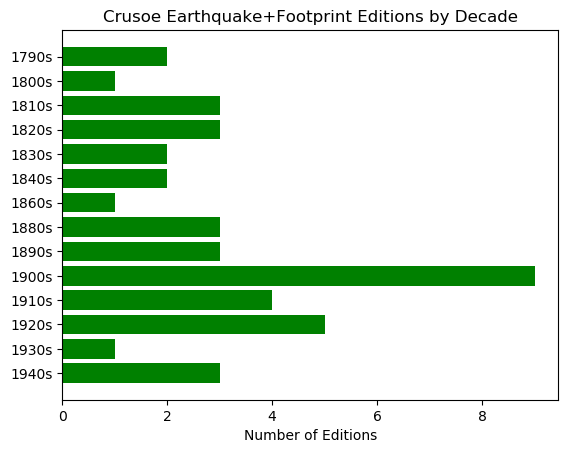

In [79]:
#graphs the type of book by decade

import matplotlib.pyplot as plt
import sys
import plotly
import plotly.plotly as py
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api
plotly.tools.set_credentials_file(username='theplotter777', api_key='pjeRBmK06cNNy6viRKCL')

#dictionary = plt.figure()


import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.rcdefaults()
fig, ax = plt.subplots()

x = []
y = []

#for foo in sorted(info, key=itemgetter(1), reverse=True):
#    x.append(foo[0])
#    y.append(foo[1])

for foo in sorted(toGraph):
    x.append(foo + '0s')
    y.append(toGraph[foo])
    
y_pos = np.arange(len(x))

ax.barh(y_pos, y, align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Editions')
ax.set_title('Crusoe Earthquake+Footprint Editions by Decade')

plt.show()

In [27]:
a = vol.term_page_freqs(page_freq=False)
print(a.loc[0:50,['the','and']])

token   the   and
page             
1       0.0   0.0
2       7.0   1.0
3       0.0   5.0
4       0.0   0.0
5       0.0   1.0
6       0.0   0.0
7       0.0   0.0
9       0.0   0.0
10      0.0   0.0
16      0.0   0.0
17      0.0   1.0
18     16.0   5.0
19      0.0   0.0
20      8.0   6.0
21     27.0  19.0
22     27.0  20.0
23      6.0  11.0
24      4.0  16.0
25     17.0  17.0
26     19.0  20.0
27     29.0  19.0
28     22.0  19.0
29     31.0  17.0
30     21.0  13.0
31     23.0  14.0
32      6.0  12.0
33     17.0  17.0
34     22.0  17.0
35     20.0  14.0
36     14.0  18.0
37     20.0  12.0
38     13.0  24.0
39     19.0  12.0
40     25.0  18.0
41     25.0  12.0
42     17.0  18.0
43     19.0  15.0
44     22.0  15.0
45     25.0  21.0
46     18.0  11.0
47     20.0  18.0
48     32.0  20.0
49     18.0  16.0
50      9.0   7.0
